In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
last_12_months_of_precipitation_data=prcp_results
last_12_months_of_precipitation_data

# Perform a query to retrieve the data and precipitation scores
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
tobs_results


[('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 80.0),
 ('USC00519397', 76.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397',

In [46]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
date = [prcp_results[0] for prcp_result in prcp_results[0:]]
prcp= [prcp_results[1] for prcp_result in prcp_results[0:]]
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.set_index('date', inplace=True, )
prcp_df.head(5)

,prcp
date,
2016-08-01,0.08
2016-08-02,0.05
2016-08-03,0.00
2016-08-04,0.04
2016-08-05,0.01


In [50]:
prcp_list = prcp_df["prcp"].tolist()

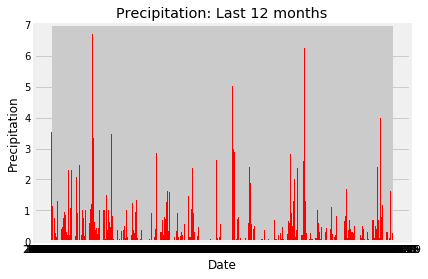

In [59]:
plt.bar(prcp_df.index.get_values(), prcp_list,color='r',align='center', label="Precipitation")
plt.title('Precipitation: Last 12 months')
plt.xlabel('Date')
plt.ylabel("Precipitation")
plt.show()

![precipitation](Images/precipitation.png)

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2070.000000
mean,0.187353
std,0.474850
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


![describe](Images/describe.png)

In [60]:
# Design a query to show how many stations are available in this dataset?
total_number_of_stations = session.query(Measurement.station).distinct(Measurement.station).count()
print(str(total_number_of_stations))

9


In [61]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Desc_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
Desc_active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [68]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()

Most_active_stations_tobs_results = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2016-08-01', '2017-08-01')).\
                                   filter(Measurement.station == Most_active_stations).all()
Most_active_stations_temp = [result[1] for result in Most_active_stations_tobs_results[0:]]
Most_active_stations_temp

[76.0,
 76.0,
 77.0,
 77.0,
 81.0,
 78.0,
 78.0,
 81.0,
 81.0,
 82.0,
 80.0,
 76.0,
 80.0,
 76.0,
 75.0,
 74.0,
 82.0,
 80.0,
 79.0,
 81.0,
 79.0,
 78.0,
 77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,

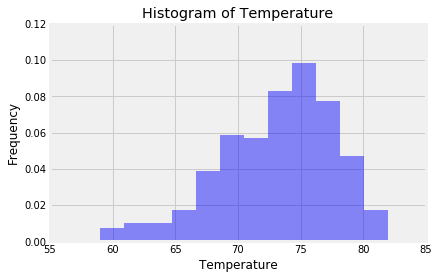

In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(Most_active_stations_temp, bins = 12, align='mid', alpha=0.45, normed=1,color="b")
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.axis([55, 85, 0, 0.12])
plt.show()


![precipitation](Images/station-histogram.png)

In [83]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [85]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(str(calc_temps('2012-02-28', '2012-03-05')))

[(62.0, 69.57142857142857, 74.0)]


In [90]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
TAVE=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]
plt.bar( 1,TAVE, color = 'blue', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.title('Trip Avg Temp')
plt.ylabel("Temperature")
plt.show()


NameError: name 'Temp' is not defined

In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


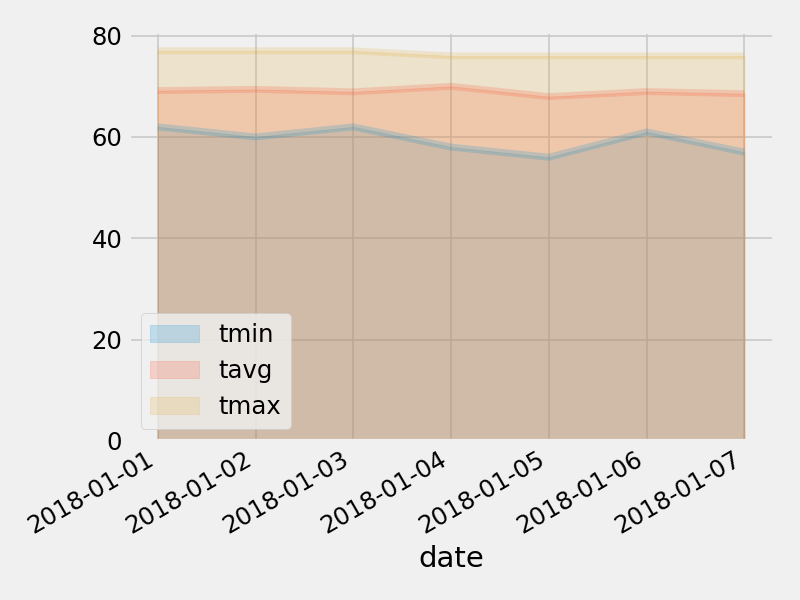

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
